# Scenario 1:

### Given File 'startup_funding.csv'
### Problem Statement :
#### Check the trend of investments over the years. To check the trend, find -
#### Total number of fundings done in each year.
#### Plot a line graph between year and number of fundings. Take year on x-axis and number of fundings on y-axis.
#### Print year-wise total number of fundings also. Print years in ascending order.
### Note :
#### There is some error in the 'Date' feature. Make sure to handle that.

In [90]:
import pandas as pd
import matplotlib.pyplot as plt

In [91]:
df = pd.read_csv("startup_funding.csv")
df.head()

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN


In [92]:
df = df[['Date', 'AmountInUSD']]
df.head()

,Date,AmountInUSD
0,01/08/2017,"1,300,000"
1,02/08/2017,NaN
2,02/08/2017,NaN
3,02/08/2017,"500,000"
4,02/08/2017,"850,000"


In [93]:
# Handling the error in Date column

df['Date'].replace("12/05.2015", "12/05/2015", inplace = True)
df['Date'].replace("13/04.2015", "13/04/2015", inplace = True)
df['Date'].replace("15/01.2015", "15/01/2015", inplace = True)

In [94]:
df["Year"] = df["Date"].apply(lambda date : date.split('/')[-1])
df.head()
# for i in df['Date']:
#     if('.' in i):
#         print(i)

,Date,AmountInUSD,Year
0,01/08/2017,"1,300,000",2017
1,02/08/2017,NaN,2017
2,02/08/2017,NaN,2017
3,02/08/2017,"500,000",2017
4,02/08/2017,"850,000",2017


In [95]:
df.drop("Date", axis = 1, inplace = True)
df.head()


,AmountInUSD,Year
0,"1,300,000",2017
1,NaN,2017
2,NaN,2017
3,"500,000",2017
4,"850,000",2017


In [96]:
df = df[['Year', 'AmountInUSD']]

df.head()

,Year,AmountInUSD
0,2017,"1,300,000"
1,2017,NaN
2,2017,NaN
3,2017,"500,000"
4,2017,"850,000"


In [97]:
df.rename(columns = {'AmountInUSD' : 'Amount'}, inplace = True)
df.head()

,Year,Amount
0,2017,"1,300,000"
1,2017,NaN
2,2017,NaN
3,2017,"500,000"
4,2017,"850,000"


In [98]:
total_fundings = {}

for i in df['Year']:
    total_fundings[i] = total_fundings.get(i, 0) + 1

total_fundings = dict(sorted(total_fundings.items()))
total_fundings

{'2015': 936, '2016': 993, '2017': 443}

In [99]:
for i in total_fundings:
    print(i, total_fundings[i])

2015 936
2016 993
2017 443


In [100]:
year = list(total_fundings.keys())
number_of_fundings = list(total_fundings.values())
year

['2015', '2016', '2017']

In [101]:
number_of_fundings

[936, 993, 443]

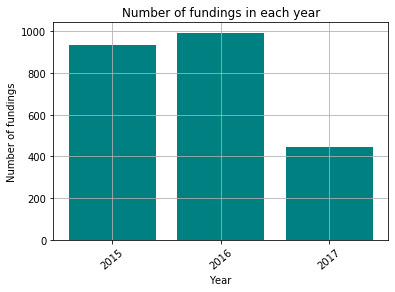

In [102]:
plt.bar(year, number_of_fundings, color = 'teal')
plt.title('Number of fundings in each year')
plt.xticks(rotation = 40)
plt.xlabel('Year')
plt.ylabel('Number of fundings')
plt.grid()
plt.show()